In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
reeses = cv2.imread('reeses_puffs.png',0)

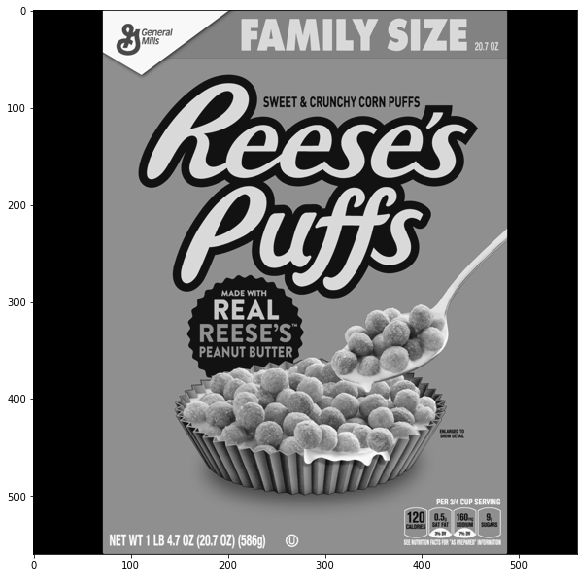

In [5]:
display(reeses)

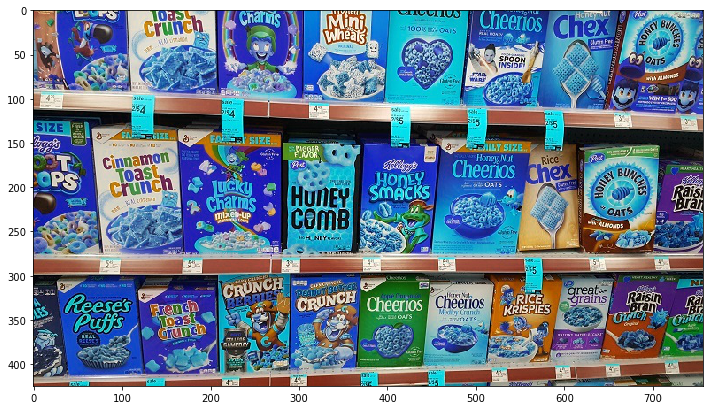

In [6]:
cereals = cv2.imread('many_cereals.jpg')
display(cereals)

In [7]:
#Method1: Brute force detection with ORB descriptors #################
orb = cv2.ORB_create()
#ORB stands for Oriented FAST and Rotated BRIEF


In [8]:
kp1,des1 = orb.detectAndCompute(reeses,None) #2nd parameter is the mask
kp2, des2 = orb.detectAndCompute(cereals,None) #This command returns the keypoints and descriptors

#A feature detector is used to detect the key points. In this case the detector used is brute force method.
#A descriptor is used to describe how these key points look like

In [9]:
brute_force = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True) #This command is used to create an instance of the matcher with the default parameters

In [10]:
matches = brute_force.match(des1,des2) #Here were trying to check for matchings between the descriptors.

In [11]:
single_match = matches[0]

In [12]:
single_match.distance #The distance attribute specifies how good of a match it was. 
#The less distance it has, a better of a match. 

78.0

In [13]:
matches = sorted(matches, key = lambda x:x.distance) #We are sorting the matches list on basis of their distance

In [14]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2) #This command is used to draw out the matching features on the original image
#5th parameter specifies how many matches need to be drawn out. In this case we are passing only first 25 matches best matches based on distance

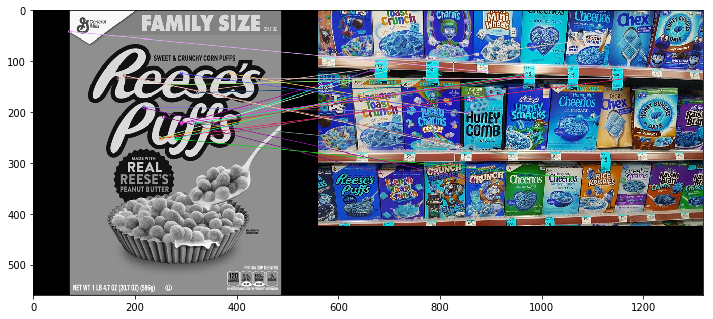

In [15]:
display(reeses_matches)

In [16]:
#We can see that this method, performs poorly 

In [17]:
#Method2: Feature matching using SIFT.
#SIFT stands for Scale Invariant Feature Transform

In [18]:
sift = cv2.xfeatures2d.SIFT_create() #This is used to create an instance of SIFT

In [19]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [20]:
brute_force = cv2.BFMatcher()

In [21]:
matches = brute_force.knnMatch(des1,des2,k=2) #It finds the K number of best matches for each descriptor from a query set

In [22]:
matches #As you can see, these matches occur in pairs, because k=2. First column represents the first best match and second best by second column

[[<DMatch 000002BA94701ED0>, <DMatch 000002BA94716050>],
 [<DMatch 000002BA94716110>, <DMatch 000002BA94716030>],
 [<DMatch 000002BA94716090>, <DMatch 000002BA94716430>],
 [<DMatch 000002BA947160B0>, <DMatch 000002BA947165B0>],
 [<DMatch 000002BA947165D0>, <DMatch 000002BA947165F0>],
 [<DMatch 000002BA94716610>, <DMatch 000002BA94716630>],
 [<DMatch 000002BA94716650>, <DMatch 000002BA94716670>],
 [<DMatch 000002BA94716690>, <DMatch 000002BA947166B0>],
 [<DMatch 000002BA947166D0>, <DMatch 000002BA947166F0>],
 [<DMatch 000002BA94716710>, <DMatch 000002BA94716730>],
 [<DMatch 000002BA94716750>, <DMatch 000002BA94716770>],
 [<DMatch 000002BA94716790>, <DMatch 000002BA947167B0>],
 [<DMatch 000002BA947167D0>, <DMatch 000002BA947167F0>],
 [<DMatch 000002BA94716810>, <DMatch 000002BA94716830>],
 [<DMatch 000002BA94716850>, <DMatch 000002BA94716870>],
 [<DMatch 000002BA94716890>, <DMatch 000002BA947168B0>],
 [<DMatch 000002BA947168D0>, <DMatch 000002BA947168F0>],
 [<DMatch 000002BA94716910>, <D

In [23]:
#Now we are going to apply the Ratio test
#I.e if the first best match is very close in distance to the second best match, then it is probably a good feature to match on.

In [24]:
good_matches = []

#Less distance means a better match
# Ratio match1< 75% match2

for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance: # if match1 distance is less than 75% to that of match2,Then we actually have a good match of that
        #particular desciptor
        #Also note, match 1 is the better match, therefore it will be having lesser distance. We do not need matches that are very close to eachother
        good_matches.append([match1])

In [25]:
print(len(matches))
print(len(good_matches))

1500
79


In [26]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good_matches,None,flags=2)

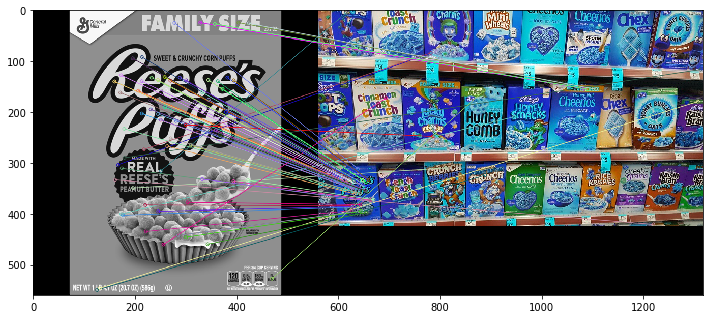

In [27]:
display(sift_matches)

In [32]:
#Method 3: FLANN based Matcher
#FLANN: Fast Library for Approximate Nearest Neighbors

In [33]:
sift = cv2.xfeatures2d.SIFT_create()

In [34]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [36]:
Flann_Index_KDTree = 0
index_params = dict(algorithm = Flann_Index_KDTree,trees = 5)
index_params

{'algorithm': 0, 'trees': 5}

In [38]:
search_params = dict(checks=50)
search_params

{'checks': 50}

In [39]:
flann = cv2.FlannBasedMatcher()

In [40]:
matches = flann.knnMatch(des1,des2,k=2)

In [41]:
good = []
for match1, match2 in matches:
    if match1.distance < 0.7 * match2.distance:
        good.append([match1])

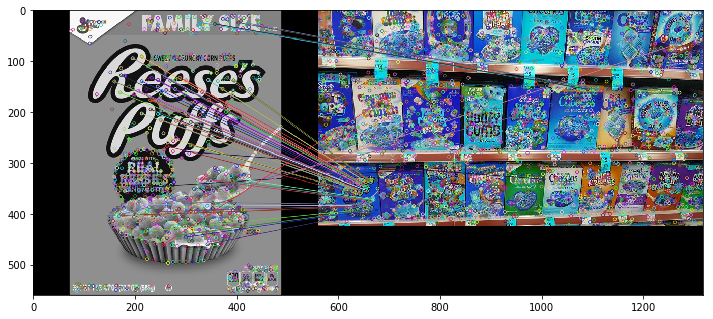

In [44]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0) #Flags = 0 shows all the features it has matched on
#But draws lines on the good matches
display(flann_matches)

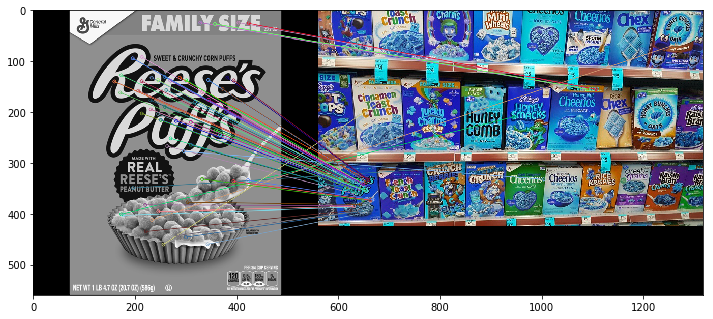

In [52]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2) #we get lines on only the good matches
display(flann_matches)
#As of now what we have done is similar to that of SIFT based matching

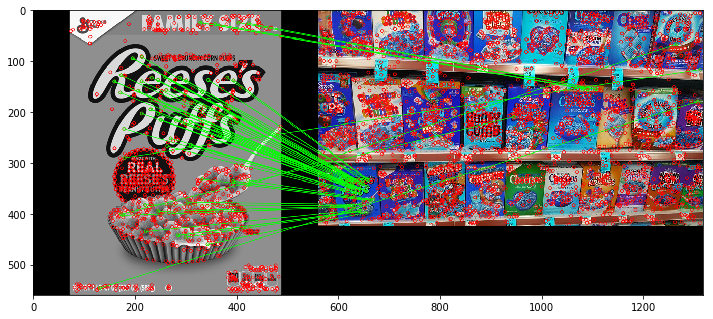

In [61]:
sift = cv2.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

sift = cv2.xfeatures2d.SIFT_create()
matches = flann.knnMatch(des1,des2,k=2)

matches_mask = [[0,0] for i in range(len(matches))]

for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7 * match2.distance:
        matches_mask[i] = [1,0]
        
draw_params = dict(matchColor=(0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matches_mask,
                   flags=0)
        
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params) #Note: here we are drawing all matches and filter them 
#based of color
display(flann_matches)